In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import wquantiles
import statsmodels
from statsmodels import robust

In [2]:
state = pd.read_csv(r"C:\Users\soumyatm.694\Documents\Science\Dataset\state.csv")

In [3]:
state.head()

,State,Population,Murder.Rate,Abbreviation
0,Alabama,4779736,5.7,AL
1,Alaska,710231,5.6,AK
2,Arizona,6392017,4.7,AZ
3,Arkansas,2915918,5.6,AR
4,California,37253956,4.4,CA


In [4]:
state.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   State         50 non-null     object 
 1   Population    50 non-null     int64  
 2   Murder.Rate   50 non-null     float64
 3   Abbreviation  50 non-null     object 
dtypes: float64(1), int64(1), object(2)
memory usage: 1.7+ KB


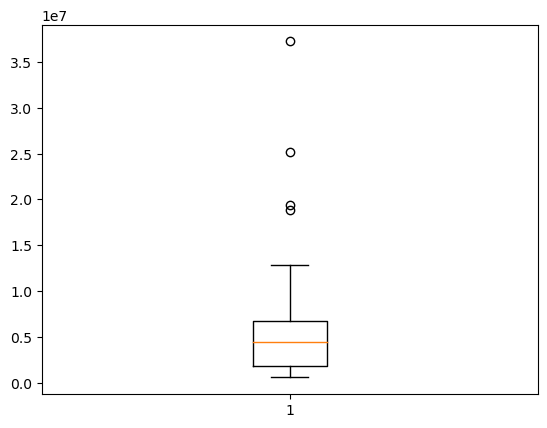

In [5]:
plt.boxplot(state['Population'])
plt.show()

In [6]:
state.Population.mean()

6162876.3

In [7]:
stats.trim_mean(state['Population'],0.1)

4783697.125

In [8]:
state.Population.median()

4436369.5

In [9]:
state.columns.array

<PandasArray>
['State', 'Population', 'Murder.Rate', 'Abbreviation']
Length: 4, dtype: object

In [10]:
state.index.array

<PandasArray>
[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37,
 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]
Length: 50, dtype: int64

In [11]:
#Weighted Mean
np.average(state['Murder.Rate'] ,weights=state.Population)

4.445833981123393

In [12]:
#Weighted Median
wquantiles.median(state['Murder.Rate'], weights=state['Population'])

4.4

In [13]:
state.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   State         50 non-null     object 
 1   Population    50 non-null     int64  
 2   Murder.Rate   50 non-null     float64
 3   Abbreviation  50 non-null     object 
dtypes: float64(1), int64(1), object(2)
memory usage: 1.7+ KB


In [14]:
state.describe()

,Population,Murder.Rate
count,5.000000e+01,50.000000
mean,6.162876e+06,4.066000
std,6.848235e+06,1.915736
min,5.636260e+05,0.900000
25%,1.833004e+06,2.425000
50%,4.436370e+06,4.000000
75%,6.680312e+06,5.550000
max,3.725396e+07,10.300000


In [15]:
state.Population.std()

6848235.347401142

In [16]:
IQR = state.Population.quantile(0.75) - state.Population.quantile(0.25)
IQR

4847308.0

In [17]:
# MAD - Median Absolute Deivation From Median
import statsmodels
from statsmodels import robust
robust.scale.mad(state.Population)

3849876.1459979336

In [18]:
state['Murder.Rate'].quantile([0.05,0.25,.5,.75,0.95])

0.05    1.600
0.25    2.425
0.50    4.000
0.75    5.550
0.95    6.510
Name: Murder.Rate, dtype: float64

Text(0, 0.5, 'Poplation in Million')

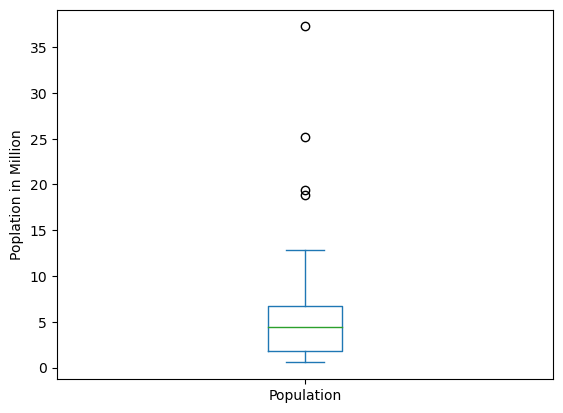

In [19]:
ax = (state.Population/1000000).plot.box()
ax.set_ylabel('Poplation in Million')

In [20]:
binnedPopulation = pd.cut(x=state['Population'],bins=[1,100,10000,100000,1000000,10000000,100000000])
binnedPopulation.value_counts()

(1000000, 10000000]      36
(100000, 1000000]         7
(10000000, 100000000]     7
(1, 100]                  0
(100, 10000]              0
(10000, 100000]           0
Name: Population, dtype: int64

In [21]:
binnedPopulation = pd.cut(state['Population'],10)
binnedPopulation.value_counts()

(526935.67, 4232659.0]      24
(4232659.0, 7901692.0]      14
(7901692.0, 11570725.0]      6
(11570725.0, 15239758.0]     2
(15239758.0, 18908791.0]     1
(18908791.0, 22577824.0]     1
(22577824.0, 26246857.0]     1
(33584923.0, 37253956.0]     1
(26246857.0, 29915890.0]     0
(29915890.0, 33584923.0]     0
Name: Population, dtype: int64

Text(0.5, 0, 'Population (millions)')

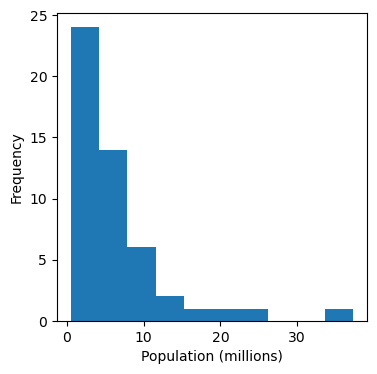

In [22]:
ax = (state['Population'] / 1000000).plot.hist(figsize=(4, 4))
ax.set_xlabel('Population (millions)')

<Axes: xlabel='Murder.Rate', ylabel='Density'>

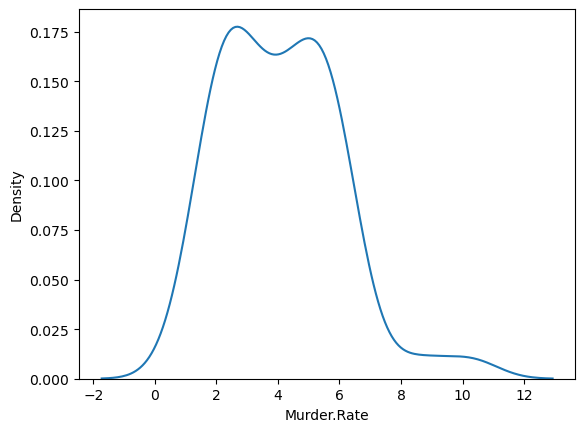

In [23]:
sns.kdeplot(data=state['Murder.Rate'])

Text(0.5, 0, 'Murder Rate (per 100,000)')

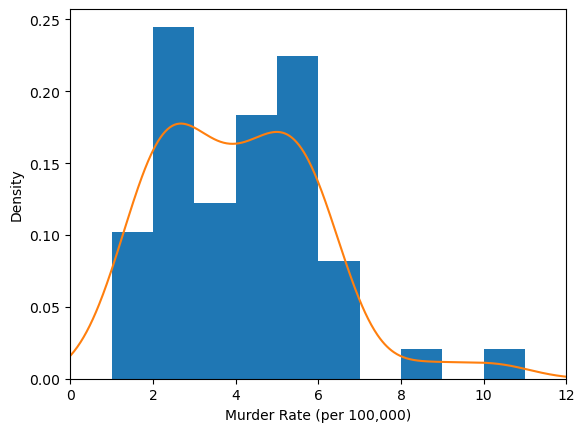

In [24]:
ax = state['Murder.Rate'].plot.hist(density=True, xlim=[0,12], bins=range(1,12))
state['Murder.Rate'].plot.density(ax=ax)
ax.set_xlabel('Murder Rate (per 100,000)')

In [25]:
dfw = pd.read_csv(r"C:\Users\soumyatm.694\Documents\Science\Dataset\dfw_airline.csv")
dfw.head()

,Carrier,ATC,Weather,Security,Inbound
0,64263.16,84856.5,11235.42,343.15,118427.82


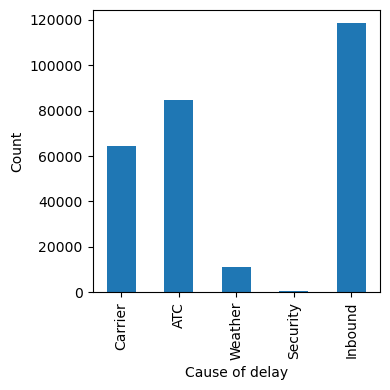

In [26]:
ax = dfw.transpose().plot.bar(figsize=(4, 4), legend=False)
ax.set_xlabel('Cause of delay')
ax.set_ylabel('Count')

plt.tight_layout()
plt.show()

In [27]:
kc_tax = pd.read_csv(r"C:\Users\soumyatm.694\Documents\Science\Dataset\kc_tax.csv")
kc_tax.head()

,TaxAssessedValue,SqFtTotLiving,ZipCode
0,NaN,1730,98117.0
1,206000.0,1870,98002.0
2,303000.0,1530,98166.0
3,361000.0,2000,98108.0
4,459000.0,3150,98108.0


In [28]:
kc_tax.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 498249 entries, 0 to 498248
Data columns (total 3 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   TaxAssessedValue  497511 non-null  float64
 1   SqFtTotLiving     498249 non-null  int64  
 2   ZipCode           467900 non-null  float64
dtypes: float64(2), int64(1)
memory usage: 11.4 MB


In [29]:
kc_tax.describe()

,TaxAssessedValue,SqFtTotLiving,ZipCode
count,4.975110e+05,498249.000000,4.679000e+05
mean,4.737959e+05,2057.651714,9.830935e+04
std,5.380832e+05,938.705293,1.440555e+05
min,1.000000e+03,0.000000,0.000000e+00
25%,2.690000e+05,1410.000000,9.803200e+04
50%,3.840000e+05,1900.000000,9.807000e+04
75%,5.490000e+05,2520.000000,9.811800e+04
max,1.235360e+08,48160.000000,9.815706e+07


In [30]:
pd.options.display.float_format = '{:20,.6f}'.format

In [31]:
kc_tax.describe()

,TaxAssessedValue,SqFtTotLiving,ZipCode
count,"497,511.000000","498,249.000000","467,900.000000"
mean,"473,795.938243","2,057.651714","98,309.352733"
std,"538,083.165146",938.705293,"144,055.461007"
min,"1,000.000000",0.000000,0.000000
25%,"269,000.000000","1,410.000000","98,032.000000"
50%,"384,000.000000","1,900.000000","98,070.000000"
75%,"549,000.000000","2,520.000000","98,118.000000"
max,"123,536,000.000000","48,160.000000","98,157,059.000000"


<Axes: >

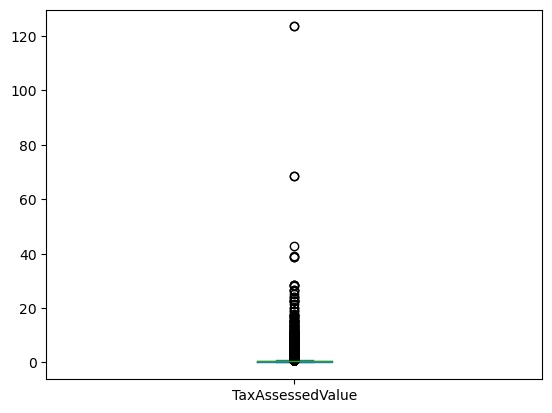

In [32]:
(kc_tax.TaxAssessedValue/1000000).plot.box()

In [33]:
kc_tax0 = kc_tax.loc[(kc_tax.TaxAssessedValue < 750000) & (kc_tax.SqFtTotLiving > 100) & (kc_tax.SqFtTotLiving < 3500), :]
kc_tax0.shape

(432693, 3)

Text(0, 0.5, 'Tax Assessed Value in Millions')

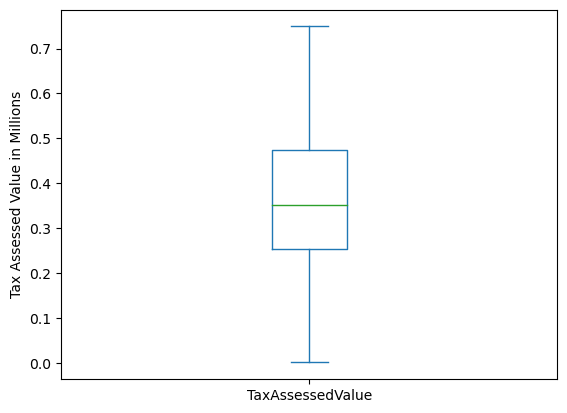

In [34]:
ax = (kc_tax0.TaxAssessedValue/1000000).plot.box()
ax.set_ylabel("Tax Assessed Value in Millions")

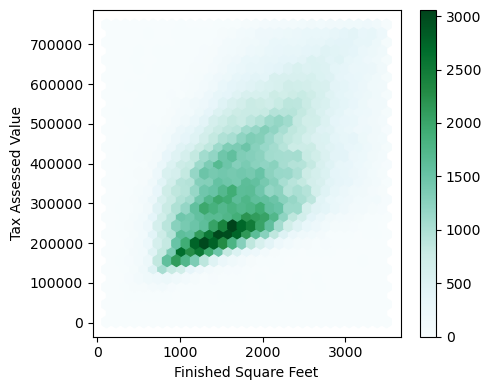

In [35]:
#Bivariate Plot
ax = kc_tax0.plot.hexbin(x='SqFtTotLiving', y='TaxAssessedValue',
                         gridsize=30, sharex=False, figsize=(5, 4))
ax.set_xlabel('Finished Square Feet')
ax.set_ylabel('Tax Assessed Value')

plt.tight_layout()
plt.show()

In [36]:
kc_tax0.ZipCode.value_counts()

   98,115.000000    13023
   98,042.000000    12741
   98,023.000000    11451
   98,058.000000    10991
   98,117.000000    10821
                    ...  
9,806,501.000000        1
   95,059.000000        1
       98.000000        1
   98,204.000000        1
   98,063.000000        1
Name: ZipCode, Length: 111, dtype: int64

In [37]:
kc_tax0.ZipCode.describe()

count         409,456.000000
mean           98,343.991210
std           153,993.451914
min                 0.000000
25%            98,032.000000
50%            98,072.000000
75%            98,119.000000
max        98,157,059.000000
Name: ZipCode, dtype: float64

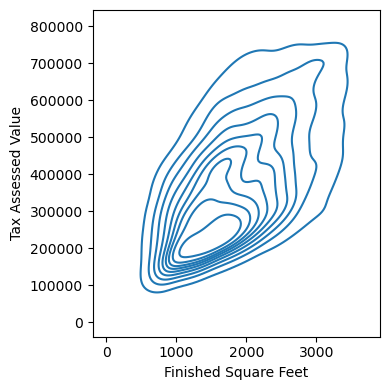

In [38]:
fig, ax = plt.subplots(figsize=(4, 4))
sns.kdeplot(data=kc_tax0.sample(10000), x='SqFtTotLiving', y='TaxAssessedValue', ax=ax)
ax.set_xlabel('Finished Square Feet')
ax.set_ylabel('Tax Assessed Value')

plt.tight_layout()
plt.show()

In [39]:
loan = pd.read_csv(r"C:\Users\soumyatm.694\Documents\Science\Dataset\lc_loans.csv")
loan.head()

,status,grade
0,Fully Paid,B
1,Charged Off,C
2,Fully Paid,C
3,Fully Paid,C
4,Current,B


In [40]:
#Contingency Table - Visualizing two Categorical data - A table of counts by category
crosstab = loan.pivot_table(index='grade', columns='status',aggfunc=lambda x: len(x), margins=True)
crosstab

status,Charged Off,Current,Fully Paid,Late,All
grade,,,,,
A,1562,50051,20408,469,72490
B,5302,93852,31160,2056,132370
C,6023,88928,23147,2777,120875
D,5007,53281,13681,2308,74277
E,2842,24639,5949,1374,34804
F,1526,8444,2328,606,12904
G,409,1990,643,199,3241
All,22671,321185,97316,9789,450961


In [41]:
dloans = crosstab.iloc[:7,:].copy()

In [42]:
dloans.loc[:,'Charged Off':'Late'] = dloans.loc[:,'Charged Off':'Late'] .div(dloans.All,axis=0) 
dloans

status,Charged Off,Current,Fully Paid,Late,All
grade,,,,,
A,0.021548,0.690454,0.281528,0.006470,72490
B,0.040054,0.709013,0.235401,0.015532,132370
C,0.049828,0.735702,0.191495,0.022974,120875
D,0.067410,0.717328,0.184189,0.031073,74277
E,0.081657,0.707936,0.170929,0.039478,34804
F,0.118258,0.654371,0.180409,0.046962,12904
G,0.126196,0.614008,0.198396,0.061401,3241


In [43]:
dloans['All'] = dloans['All']/sum(dloans['All'])
dloans

status,Charged Off,Current,Fully Paid,Late,All
grade,,,,,
A,0.021548,0.690454,0.281528,0.006470,0.160746
B,0.040054,0.709013,0.235401,0.015532,0.293529
C,0.049828,0.735702,0.191495,0.022974,0.268039
D,0.067410,0.717328,0.184189,0.031073,0.164708
E,0.081657,0.707936,0.170929,0.039478,0.077177
F,0.118258,0.654371,0.180409,0.046962,0.028614
G,0.126196,0.614008,0.198396,0.061401,0.007187


In [44]:
airline_stats =pd.read_csv(r"C:\Users\soumyatm.694\Documents\Science\Dataset\airline_stats.csv")
airline_stats.head()

,pct_carrier_delay,pct_atc_delay,pct_weather_delay,airline
0,8.153226,1.971774,0.762097,American
1,5.959924,3.706107,1.585878,American
2,7.157270,2.706231,2.026706,American
3,12.100000,11.033333,0.000000,American
4,7.333333,3.365591,1.774194,American


In [45]:
airline_stats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33468 entries, 0 to 33467
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   pct_carrier_delay  33440 non-null  float64
 1   pct_atc_delay      33440 non-null  float64
 2   pct_weather_delay  33440 non-null  float64
 3   airline            33468 non-null  object 
dtypes: float64(3), object(1)
memory usage: 1.0+ MB


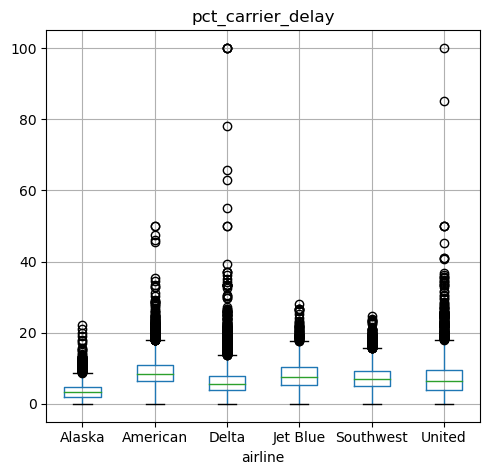

In [46]:
airline_stats.boxplot(by='airline', column='pct_carrier_delay',figsize=(5, 5))
ax.set_xlabel('')
ax.set_ylabel('Daily % of Delayed Flights')
plt.suptitle('')

plt.tight_layout()
plt.show()

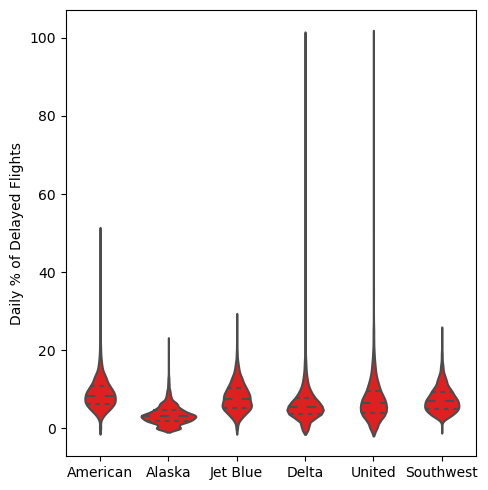

In [47]:
fig, ax = plt.subplots(figsize=(5, 5))
sns.violinplot(data=airline_stats, x='airline', y='pct_carrier_delay',
               ax=ax, inner='quartile', color='red')
ax.set_xlabel('')
ax.set_ylabel('Daily % of Delayed Flights')

plt.tight_layout()
plt.show()

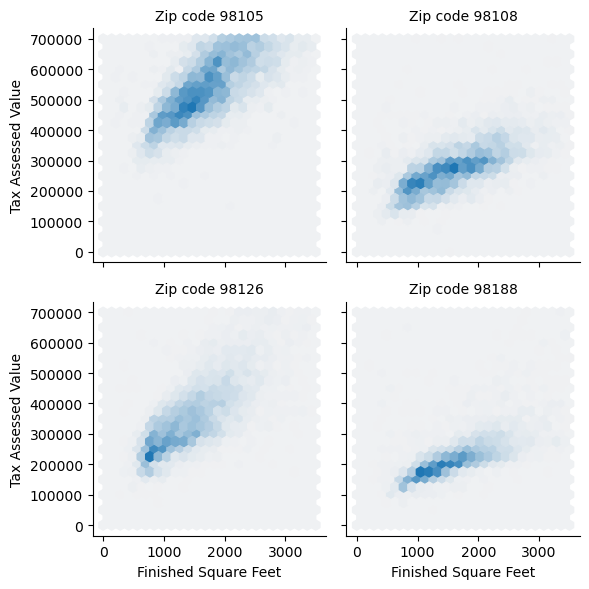

In [48]:
zip_codes = [98188, 98105, 98108, 98126]
kc_tax_zip = kc_tax0.loc[kc_tax0.ZipCode.isin(zip_codes),:]
kc_tax_zip

def hexbin(x, y, color, **kwargs):
    cmap = sns.light_palette(color, as_cmap=True)
    plt.hexbin(x, y, gridsize=25, cmap=cmap, **kwargs)

g = sns.FacetGrid(kc_tax_zip, col='ZipCode', col_wrap=2)
g.map(hexbin, 'SqFtTotLiving', 'TaxAssessedValue', 
      extent=[0, 3500, 0, 700000])
g.set_axis_labels('Finished Square Feet', 'Tax Assessed Value')
g.set_titles('Zip code {col_name:.0f}')

plt.tight_layout()
plt.show()

In [49]:
from sklearn.utils import resample

In [50]:
loans_income = pd.read_csv(r"C:\Users\soumyatm.694\Documents\Science\Dataset\loans_income.csv").squeeze('columns')
loans_income.head()

0     67000
1     52000
2    100000
3     78762
4     37041
Name: x, dtype: int64

In [51]:
results = []
crude_sample = pd.DataFrame([])
for nrepeat in range(1000):
    sample = resample(loans_income)
    results.append(sample.median())
    if sample.median() != 62000:
        crude_sample = sample.copy()
results = pd.Series(results)

In [52]:
loans_income.median()

62000.0

In [53]:
results.mean() - loans_income.median()

-70.85349999999744

In [54]:
results.std()

216.8645649415274

In [55]:
results.mean()

61929.1465

In [56]:
pd.DataFrame(results)

,0
0,"62,000.000000"
1,"62,000.000000"
2,"62,000.000000"
3,"62,000.000000"
4,"62,000.000000"
...,...
995,"62,000.000000"
996,"62,000.000000"
997,"62,000.000000"
998,"61,800.000000"


In [57]:
sample.info()

<class 'pandas.core.series.Series'>
Int64Index: 50000 entries, 49206 to 9963
Series name: x
Non-Null Count  Dtype
--------------  -----
50000 non-null  int64
dtypes: int64(1)
memory usage: 781.2 KB


In [58]:
sample.median()

62000.0

In [59]:
crude_sample.describe()

count          50,000.000000
mean           68,558.719260
std            32,937.199578
min             4,000.000000
25%            45,000.000000
50%            61,800.000000
75%            85,000.000000
max           199,000.000000
Name: x, dtype: float64

In [60]:
loans_income.info()

<class 'pandas.core.series.Series'>
RangeIndex: 50000 entries, 0 to 49999
Series name: x
Non-Null Count  Dtype
--------------  -----
50000 non-null  int64
dtypes: int64(1)
memory usage: 390.8 KB


In [61]:
loan10 = loans_income[:10]

In [62]:
loan10 

0     67000
1     52000
2    100000
3     78762
4     37041
5     33000
6     38500
7     85000
8    120000
9     57000
Name: x, dtype: int64

In [63]:
loan10.describe()

count              10.000000
mean           66,830.300000
std            28,965.205840
min            33,000.000000
25%            41,875.000000
50%            62,000.000000
75%            83,440.500000
max           120,000.000000
Name: x, dtype: float64

In [64]:
sample = resample(loan10)
sample

2    100000
7     85000
0     67000
5     33000
6     38500
6     38500
3     78762
6     38500
8    120000
8    120000
Name: x, dtype: int64

In [65]:
sample.describe()

count              10.000000
mean           71,926.200000
std            34,188.074886
min            33,000.000000
25%            38,500.000000
50%            72,881.000000
75%            96,250.000000
max           120,000.000000
Name: x, dtype: float64

In [66]:
sample = resample(loan10)
sample

5     33000
6     38500
1     52000
1     52000
0     67000
8    120000
5     33000
1     52000
0     67000
9     57000
Name: x, dtype: int64

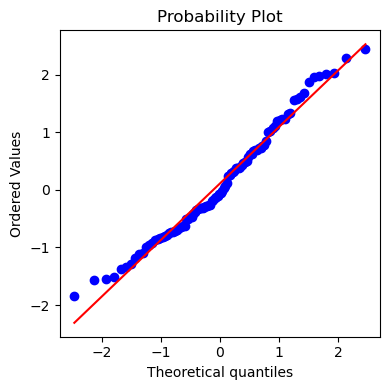

In [68]:
# NORMAL Distribution QQ plot
fig,ax = plt.subplots(figsize=(4,4))
norm_sample = stats.norm.rvs(size=100)

stats.probplot(norm_sample,plot=ax)
plt.tight_layout()
plt.show()

In [69]:
sp500_data = pd.read_csv(r"C:\Users\soumyatm.694\Documents\Science\Dataset\sp500_data.csv")
sp500_data.head()

,Unnamed: 0,ADS,CA,MSFT,RHT,CTSH,CSC,EMC,IBM,XRX,...,WAT,ALXN,AMGN,BXLT,BIIB,CELG,GILD,REGN,VRTX,HSIC
0,1993-01-29,0.000000,0.060124,-0.022100,0.000000,0.000000,0.018897,0.007368,0.092165,0.259140,...,0.000000,0.000000,0.347160,0.000000,0.041670,0.000000,0.015564,1.750000,0.125000,0.000000
1,1993-02-01,0.000000,-0.180389,0.027621,0.000000,0.000000,0.018889,0.018425,0.115207,-0.100775,...,0.000000,0.000000,-0.231440,0.000000,0.000000,-0.010410,0.007782,1.250000,0.125000,0.000000
2,1993-02-02,0.000000,-0.120257,0.035900,0.000000,0.000000,-0.075573,0.029482,-0.023041,0.028796,...,0.000000,0.000000,-0.115720,0.000000,0.000000,0.000000,-0.007792,-0.250000,0.000000,0.000000
3,1993-02-03,0.000000,0.060124,-0.024857,0.000000,0.000000,-0.151128,0.003689,-0.253454,-0.043190,...,0.000000,0.000000,-0.086790,0.000000,0.041670,-0.041670,-0.038919,-0.500000,0.062500,0.000000
4,1993-02-04,0.000000,-0.360770,-0.060757,0.000000,0.000000,0.113350,-0.022114,0.069862,0.000000,...,0.000000,0.000000,0.144650,0.000000,-0.041660,-0.031260,-0.046711,0.000000,0.062500,0.000000


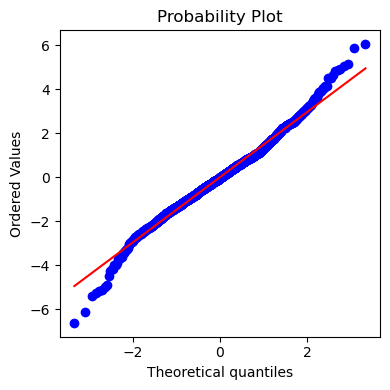

In [76]:
nflx = sp500_data.NFLX
nflx = np.diff(np.log(nflx[nflx>0]))

fig, ax = plt.subplots(figsize=(4, 4))
stats.probplot(nflx, plot=ax)

plt.tight_layout()
plt.show()

In [79]:
sp500_data[sp500_data["NFLX"]> 0 ]["NFLX"].describe()

count           1,613.000000
mean                0.296133
std                 0.452380
min                 0.000714
25%                 0.041429
50%                 0.108571
75%                 0.352858
max                 4.292854
Name: NFLX, dtype: float64

Binomial Distribution

In [83]:
print(stats.binom.pmf(0,n=200,p=0.02))

0.0175879466057215


In [85]:
print(stats.binom.cdf(2,n=200,p=0.02))

0.23514813577270552


In [ ]:
state.